# Classification Project: Personal Loan Campaign Modeling

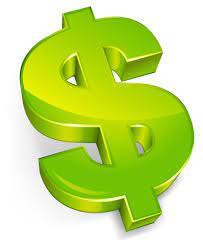

#### The objective of this project is to assess a personal loan dataset and create two models, one using logistic regression, and one using a decision tree approach, that will classify future customers seeking personal loans and attempt to determine if the customers will accept the loans or not. In other words, the model will determine whether or not our customers will take out a loan with us and drive interest revenue.

### Variables in the Dataset:

* ID: Customer ID
* Age: Customer’s age
* Experience: # years of professional experience
* Income: Annual income of the customer (in thousands of dollars)
* ZIP Code: Home Address ZIP code
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousands of dollars)
* Education: 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage (in thousands of dollars)
* Personal_Loan (Target Variable): Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

It looks like some of the variables are straight numeric, some are categorical and will need to be turned into dummy variables, and some are categorical but binary and can be 1/0'ed.

## Exploratory Data Analysis and Insights

Staple data science libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Read the data into a DataFrame:

In [2]:
loans = pd.read_csv('Loan_Modelling.csv')

Quick look at the data structure:

In [3]:
loans.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Check the initial data types for anything flagrant:

In [4]:
loans.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

Check for any standard missing values:

In [5]:
loans.count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIPCode               5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal_Loan         5000
Securities_Account    5000
CD_Account            5000
Online                5000
CreditCard            5000
dtype: int64

Fortunately it looks like the dataset is quite clean, but we need to be aware of potential "hidden" missing values.

In [6]:
loans.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Eliminating the ID since it has no analytical value. Also eliminating ZIPCode since they are essentially categorical labels rather than numbers. You could convert zip code to city or state and potentially find some patterns, but there is so much variation in other variables throughout the various cities and states that you might be pooling what shouldn't be pooled as well.

Experience has a negative value, so it will need to be cleaned, but we'll find later it can be dropped and Age used in its place due to multicollinearity.

In [7]:
loans.drop(['ID', 'ZIPCode'], axis=1, inplace=True)
loans.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

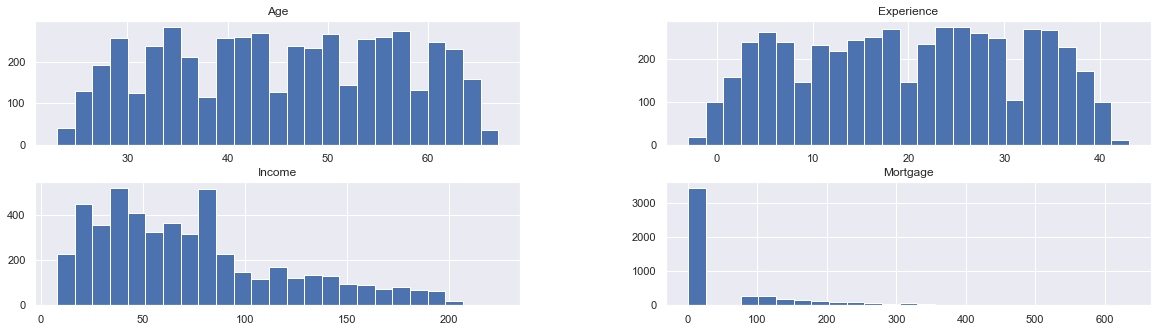

In [8]:
loans[['Age', 'Experience', 'Income', 'Mortgage']].hist(stacked=False, bins=25, figsize=(20,20), layout=(7,2)); 

Age and Experience appear to be roughly normally-distributed with a mound shape to them. Income is a skewed-right distribution so I will check for outliers there. Also, Mortgage has a strange distribution because many of the customers do not have a mortgage balance.

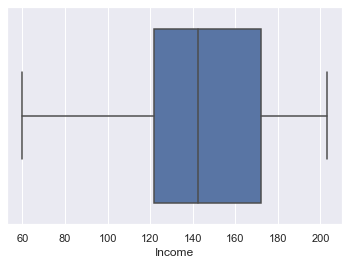

In [9]:
sns.boxplot(x=loans[loans.Personal_Loan == 1].Income);

Descriptive information for Income on only the customers that took out loans:

In [10]:
loans[loans.Personal_Loan == 1].Income.describe()

count    480.000000
mean     144.745833
std       31.584429
min       60.000000
25%      122.000000
50%      142.500000
75%      172.000000
max      203.000000
Name: Income, dtype: float64

Most of the customers that took a loan were concentrated in the $122K-172K income range.

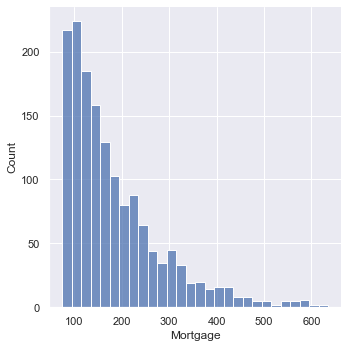

In [11]:
sns.displot(loans[loans.Mortgage > 0].Mortgage);

It looks like the maximum income is 224k, which is not an unreasonable amount of income for a high income. So, the high values will not be treated as outliers. The distribution appears to fit a typical income distribution.

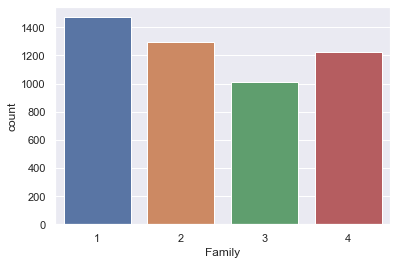

In [12]:
sns.countplot(x=loans['Family']);

Family is fairly uniformly distributed with a slight edge to family of size 1, 2, and 4.

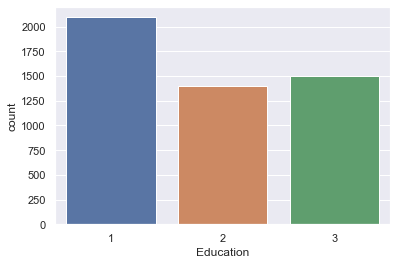

In [13]:
sns.countplot(x=loans['Education']);

Rather than do a pairplot, due to the number of variables, a correlation matrix and heatmap will suffice.

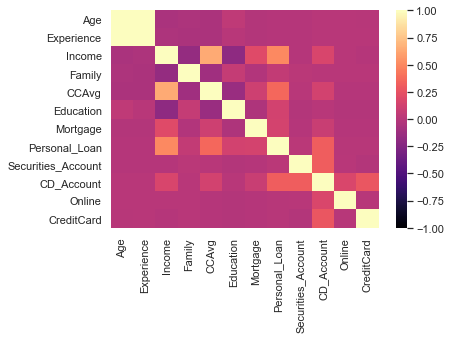

In [14]:
sns.heatmap(loans.corr(), vmin=-1, vmax=1, cmap='magma');

It appears that Income and Average CC balance have a high correlation but are not perfectly correlated so both can be used in the model.  All other bi-variate interactions are weaker than those two, but income seems to be correlated to a few variables which is to be expected. Age and Experience are so highly correlated that only one should be used in the model. 

Check the categorical variables for any strange values; determine if they are binary or have multiple potential values:

In [15]:
for col in loans.drop(['Age', 'Experience', 'Income', 'Mortgage', 'CCAvg'], axis=1).columns:
    print(loans[col].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal_Loan, dtype: int64
0    4478
1     522
Name: Securities_Account, dtype: int64
0    4698
1     302
Name: CD_Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


It appears that the categorical variables are clean and just need to be handled appropriately for feeding into an ML model.

## Grooming Categorical Variables

Create dummy variables for Family and Education:

In [16]:
family_dummies = pd.get_dummies(loans.Family, prefix='Family')
education_dummies = pd.get_dummies(loans.Education, prefix='Edu')

In [17]:
loans = pd.concat([loans, family_dummies, education_dummies], axis=1)

Drop Family and Education because they've been turned into dummies and drop Experience because it's replaced by Age due to almost perfect correlation.

In [18]:
loans.drop(['Family', 'Education', 'Experience'], axis=1, inplace=True)

In [19]:
loans.head()

,Age,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Edu_1,Edu_2,Edu_3
0,25,49,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,34,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,11,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,100,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,45,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0


## Train/Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, x_test, Y_train, y_test = train_test_split(loans.drop(['Personal_Loan'], axis=1), loans['Personal_Loan'], test_size=.30, random_state=1337)

## Metrics

Define a function to print out out ML-specific metrics easily:

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

def get_metrics(targets, predictions):
    print('Accuracy: ', accuracy_score(targets, predictions))
    print('Precision: ', precision_score(targets, predictions))
    print('Recall: ', recall_score(targets, predictions))
    print('F1: ', f1_score(targets, predictions))

## Logistic Regression Model

The first model I'll attempt will be a logistic regression.

Create a LogisticRegression object via instantiation:

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000, random_state=1)

In [24]:
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, random_state=1)

Ok, the model is fit. Let's look at coefficients:

In [25]:
pd.Series(index=X_train.columns, data=np.reshape(lr.coef_, len(X_train.columns)))

Age                   0.009793
Income                0.059429
CCAvg                 0.177198
Mortgage              0.001162
Securities_Account   -0.487738
CD_Account            3.075352
Online               -0.714914
CreditCard           -0.759687
Family_1             -0.905194
Family_2             -1.059519
Family_3              1.163745
Family_4              0.827955
Edu_1                -2.407942
Edu_2                 1.147928
Edu_3                 1.287001
dtype: float64

The coefficients are a little rough to interpret, but it looks like CCAvg and Mortgage have the strongest positive influence on the class selection.

Checking the accuracy score on the training vs. test data to see if the model is potentially overfitting or underfitting:

In [26]:
lr.score(X_train, Y_train)

0.9622857142857143

In [27]:
lr.score(x_test, y_test)

0.958

The results are reasonably close, so the model appears to be fit well. But raw accuracy isn't everything, we will want to look at a confusion matrix. More metrics to come.

Predict classes based on the x_test data:

In [28]:
lr_predictions = lr.predict(x_test)

In [29]:
from sklearn.feature_selection import mutual_info_classif

pd.Series(data=mutual_info_classif(X_train, Y_train), index=X_train.columns).sort_values(ascending=False)

Income                0.130057
CCAvg                 0.083647
CD_Account            0.028760
Mortgage              0.015336
Edu_1                 0.012805
Securities_Account    0.009786
Edu_2                 0.008639
Edu_3                 0.007297
Family_1              0.005696
CreditCard            0.004359
Age                   0.004045
Family_4              0.000000
Family_3              0.000000
Family_2              0.000000
Online                0.000000
dtype: float64

It appears that Income is the highest determinant of whether the customer will accept the loan according to this model, followed by Average Credit Balance and if the customer has a CD or not.

In [30]:
y_test.value_counts()

0    1353
1     147
Name: Personal_Loan, dtype: int64

So, 147 customers took the loan in the test data and 1,353 did not in the actuals.

Let's see how the model performed against those actuals.

In [31]:
confusion_matrix(y_test, lr_predictions)

array([[1341,   12],
       [  51,   96]], dtype=int64)

### 96 True Positives, 1,341 True Negatives, 51 False Positives, 12 False Negatives


#### True Positives:

- Reality: Customer took the loan.
- Model predicted: The customer's loan interest will contribute to revenue.
- Outcome: The model is good at forecasting these customers.

#### True Negatives:
- Reality: Customer did not make a purchase.
- Model predicted: The customer will not take a loan.
- Outcome: Revenue is unaffected by this forecast, but other ways to attract these customers could be investigated.

#### False Positives:

- Reality: Customer did not take the loan.
- Model predicted: The customer will take out the loan.
- Outcome: Effort will be spent targeting these customers but ultimately they will not take the loan, therefore costs will be driven to the business.

#### False Negatives:

- Reality: Customer took the loan.
- Model predicted: The customer will not take the loan.
- Outcome: The customer is not targeted despite the fact they would have taken the loan. This can lead to lost revenue and lower customer retention.

Not targeting a customer that would have purchased a loan is the biggest risk here (Type II error). Recall is the right metric to check the performance of the model.

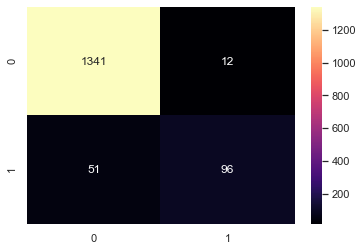

In [32]:
sns.heatmap(confusion_matrix(y_test, lr_predictions), cmap='magma', annot=True, fmt='d');

Use the get_metrics() function to see a summary of the model's performance:

In [33]:
get_metrics(y_test, lr_predictions)

Accuracy:  0.958
Precision:  0.8888888888888888
Recall:  0.6530612244897959
F1:  0.7529411764705882


Since Recall is our targeted metric, this model, despite its accuracy, is not performing well in regard to False Negatives.

## Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeClassifier 

Instantiate a DecisionTreeClassifier object:

In [35]:
dtc = DecisionTreeClassifier(random_state=1)

First, I'm going to try a completely unpruned Decision Tree, which tends to overfit the data and be too complex.

In [36]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

Importance of each variable in the model:

In [37]:
pd.Series(data=dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

Edu_1                 0.350380
Income                0.329019
Family_3              0.080519
CCAvg                 0.074703
Family_4              0.067745
Age                   0.037420
CD_Account            0.022875
Edu_2                 0.014785
Family_1              0.007349
Family_2              0.005531
Mortgage              0.003983
Edu_3                 0.003690
Online                0.001150
CreditCard            0.000851
Securities_Account    0.000000
dtype: float64

According to this Decision Tree, the most important features in determining a customer's acceptance of the personal loan is Education, Income, and Family.

So taking the accuracy score on the unpruned Decision Tree should yield a ~100% accuracy.

In [38]:
dtc.score(X_train, Y_train)

1.0

In [39]:
dtc.score(x_test, y_test)

0.9813333333333333

The model performs well on the test data as well despite being unpruned, which is a good sign. More metrics below!

We will predict on the test data using the model and see how it performs.

In [40]:
dtc_predictions = dtc.predict(x_test)

In [41]:
confusion_matrix(y_test, dtc_predictions)

array([[1347,    6],
       [  22,  125]], dtype=int64)

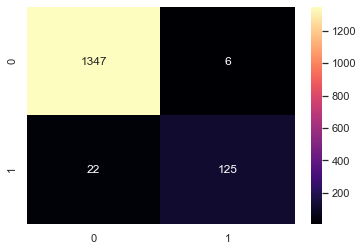

In [42]:
sns.heatmap(confusion_matrix(y_test, dtc_predictions), cmap='magma', annot=True, fmt='d');

Although the confusion matrix isn't massively different at first glance, the number of True Positives has increased substantially and both Type I and Type II error have decreased significantly.  This should reflect positively in the metrics.

In [43]:
get_metrics(y_test, dtc_predictions)

Accuracy:  0.9813333333333333
Precision:  0.9541984732824428
Recall:  0.8503401360544217
F1:  0.8992805755395683


In addition, it not only has high accuracy in predicting against the test data, it has a formidable Precision, Recall, and F1 score! Recall is our critical metric, so this model is doing quite well across the board. And this is against test data, so we're not just seeing overfitting.

A text visualization of the tree since this tree will be complex:

In [44]:
from sklearn import tree

print(tree.export_text(dtc, feature_names=list(X_train.columns), show_weights=True))

|--- Income <= 121.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2534.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Edu_1 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Income <= 118.00
|   |   |   |   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |   |   |--- weights: [19.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |   |   |--- Income <= 113.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Income >  113.00
|   |   |   |   |   |   |   |   |   |   |--- CCAvg <= 2.55
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |

### Trying Some Pruning

I want to see if a pruned decision tree can perform as well as the full tree, or closely enough that it's worth pruning!

In [45]:
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=1)
dtc2.fit(X_train, Y_train)

dtc2_predictions = dtc2.predict(x_test)
get_metrics(y_test, dtc2_predictions)

Accuracy:  0.97
Precision:  0.9903846153846154
Recall:  0.7006802721088435
F1:  0.8207171314741036


In [46]:
confusion_matrix(y_test, dtc_predictions)

array([[1347,    6],
       [  22,  125]], dtype=int64)

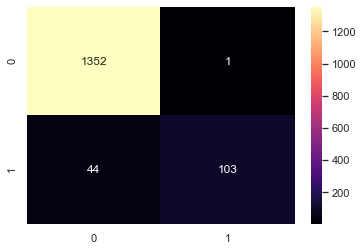

In [47]:
sns.heatmap(confusion_matrix(y_test, dtc2_predictions), cmap='magma', annot=True, fmt='d');

Toying with minimum samples per leaf instead:

In [48]:
dtc2 = DecisionTreeClassifier(min_samples_leaf=50, random_state=1)
dtc2.fit(X_train, Y_train)

dtc2_predictions = dtc2.predict(x_test)
get_metrics(y_test, dtc2_predictions)

Accuracy:  0.962
Precision:  0.9245283018867925
Recall:  0.6666666666666666
F1:  0.774703557312253


In [49]:
confusion_matrix(y_test, dtc_predictions)

array([[1347,    6],
       [  22,  125]], dtype=int64)

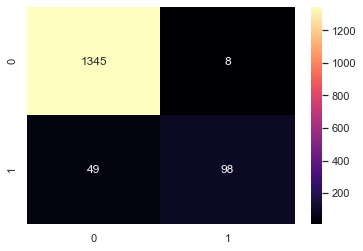

In [50]:
sns.heatmap(confusion_matrix(y_test, dtc2_predictions), cmap='magma', annot=True, fmt='d');

So a couple different quick looks at hyperparameter adjustments reveals some variation in how the model will perform, but it's arguably working well in any configuration.

### Plot the simpler Tree (Simply) Using plot_tree

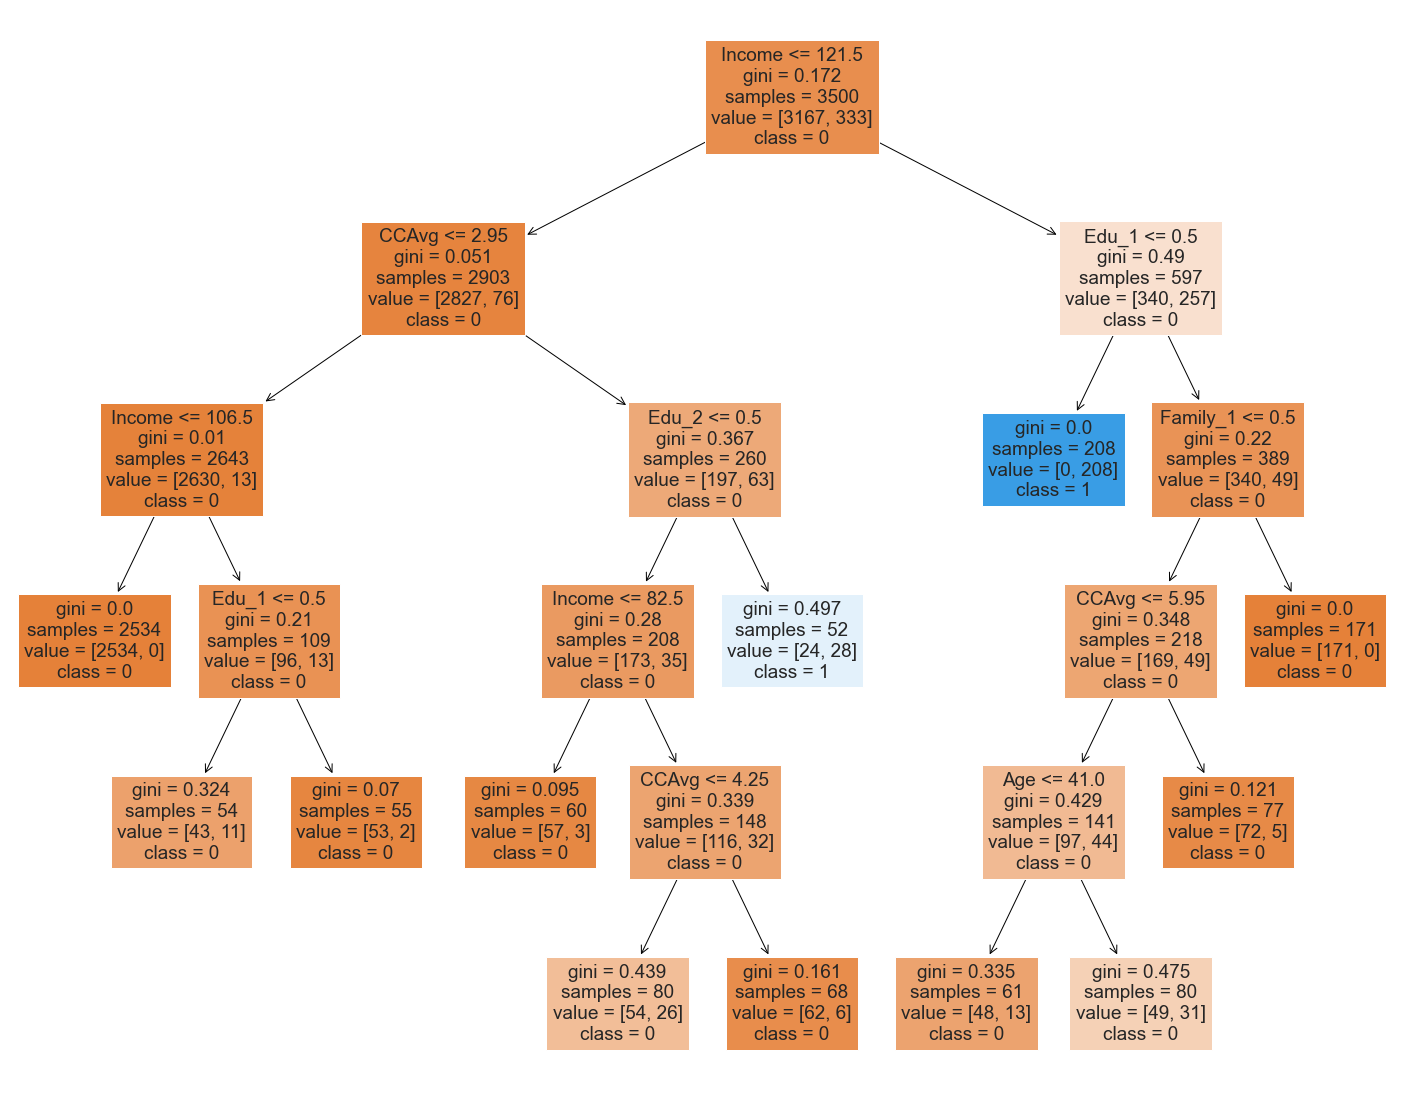

In [51]:
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(dtc2, feature_names=list(X_train.columns), class_names=['0', '1'], filled=True);

for node in tree_plot:
    arrow = node.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Grid Search for Optimal HyperParameters

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [53]:
%%time

dtc3 = DecisionTreeClassifier(random_state=1)

hyperparameters = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_features": ["log2", "sqrt"] }

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(dtc3, hyperparameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Use the best estimator
dtc3 = grid_obj.best_estimator_

# Fit the model using the best estimator (combo of hyperparameters)
dtc3.fit(X_train, Y_train)

Wall time: 4.43 s


DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_impurity_decrease=0.0001, random_state=1)

In [54]:
dtc3_predictions = dtc3.predict(x_test)
get_metrics(y_test, dtc3_predictions)

Accuracy:  0.978
Precision:  0.9453125
Recall:  0.8231292517006803
F1:  0.88


In [55]:
confusion_matrix(y_test, dtc3_predictions)

array([[1346,    7],
       [  26,  121]], dtype=int64)

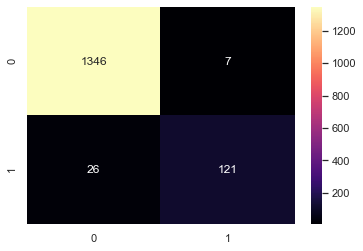

In [56]:
sns.heatmap(confusion_matrix(y_test, dtc3_predictions), cmap='magma', annot=True, fmt='d');

Feature Importances:

In [57]:
pd.Series(index=x_test.columns, data=dtc3.feature_importances_).sort_values(ascending=False)

Income                0.435721
CCAvg                 0.348238
Family_4              0.064915
Edu_1                 0.039423
Age                   0.036066
Family_3              0.026597
Family_2              0.018963
CD_Account            0.006577
Family_1              0.005516
Securities_Account    0.005186
CreditCard            0.004927
Edu_2                 0.004076
Mortgage              0.002925
Online                0.000870
Edu_3                 0.000000
dtype: float64

So the Grid Search says this is the best combination of hyperparameters. It yields a 98% accuracy with an 82% recall. Pretty good, but slightly less performant than the unpruned tree and still 9 levels of complexity. Income and Credit Card Average are the two most important factors.

## Conclusion and Recommendations

The Logistic Regression model didn't perform nearly as well as the Decision Tree on this slightly complex dataset. Although its Accuracy was high, its auxillary metrics didn't score highly.

The decision tree, on the other hand, scored extremely well in all metrics, especially for the full tree but also well for a parameterized tree.

I would advise that we use the optimized decision tree model as it performs highly with less complexity, and it tells us that education and income are the two biggest determinants in whether a customer will accept a personal loan. Undergraduates tend to accept the loans most frequently, with higher levels of education adding little to no chance of loan acceptance. We should target undergraduates with the indicated income level of approximately $75-175k/year.